<a href="https://colab.research.google.com/github/obaidullah-miakhil/Naive-Bayes-and-Advanced-Models-in-ML/blob/main/Implementation_of_Naive_Bayes_and_Advanced_Models_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Lab Title:
**Implementation of Naive Bayes and Advanced Models in Machine Learning**

## Course:
**Machine Learning**

## Student Details:
- **Name**: obaidullah miakhil
- **Instructor**: Dr. Abid Ali
- **Lab Supervisor**: Miss. Sana Sikandar
- **Institution**: Pak-Austria Fachhochschule: Institute of Applied Sciences & Technology (PAF-IAST)
- **Date**: 30-nov-2024

## Lab Objectives:
1. To understand the implementation of Gaussian Naive Bayes and advanced models like Random Forest and SVM.
2. To apply feature engineering techniques such as PCA for dimensionality reduction.
3. To evaluate model performance using metrics like accuracy, confusion matrix, and cross-validation.
4. To enhance model interpretability with visualization techniques.

## Learning Outcomes:
1. Mastery of exploratory data analysis (EDA) and feature preprocessing techniques.
2. Implementation and comparison of multiple machine learning models.
3. Visualization and interpretation of classification results using various metrics.


---
# Task 1: Exploratory Data Analysis (EDA)

## Objective:
To load a new dataset, perform exploratory data analysis (EDA), and visualize the data distribution.

## Code Explanation:
1. **Dataset Selection**: The Iris dataset was chosen, which is widely used for classification problems.
2. **Data Loading**: Loaded the dataset using `load_iris()` from `sklearn.datasets` and converted it to a pandas DataFrame for easier manipulation.
3. **Basic Information**:
   - Displayed the dataset structure, column types, and initial few rows using `.info()` and `.head()`.
   - Checked for missing values using `.isnull().sum()`.
4. **Data Visualization**:
   - Used `seaborn` to create pair plots for visualizing feature distributions and their relationship with the target variable.
   - Correlation heatmap was plotted to identify relationships between features.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   


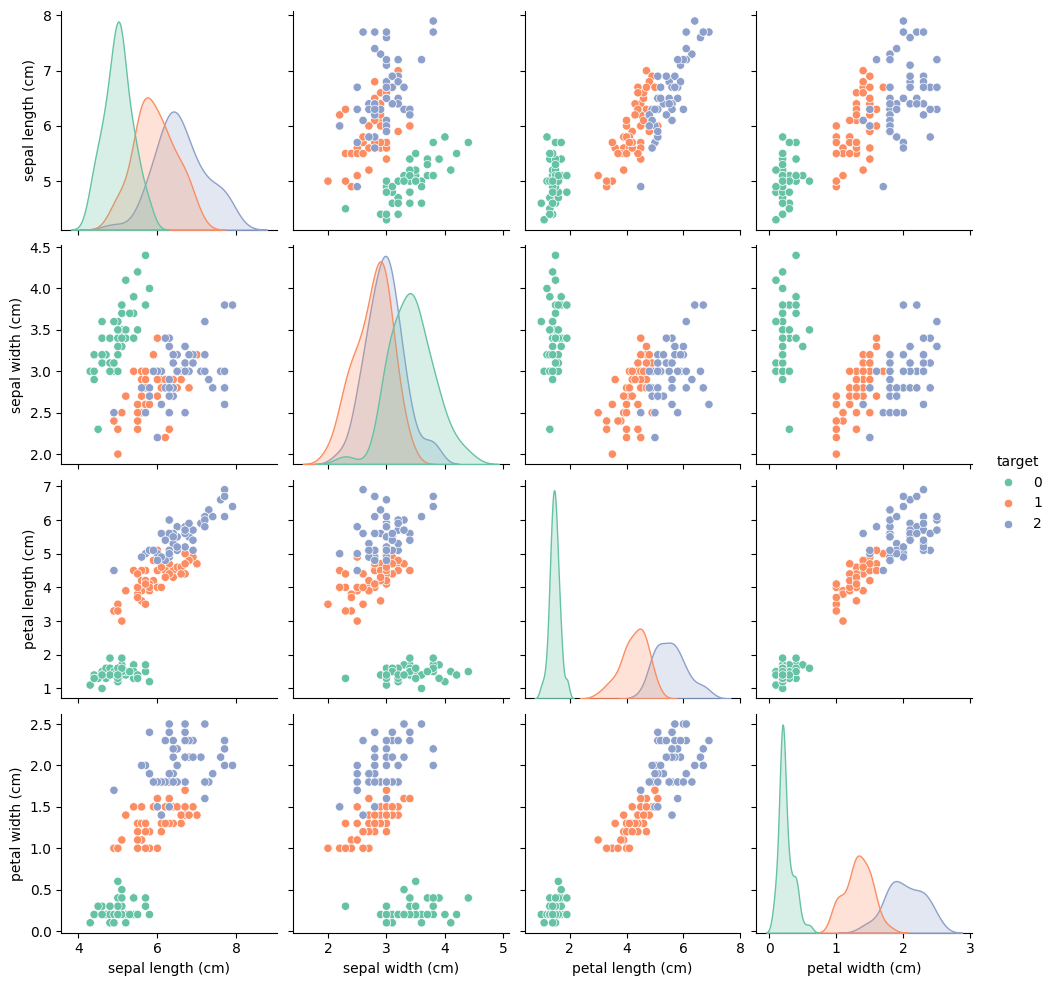

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Load a different dataset (e.g., Iris dataset from sklearn)
from sklearn.datasets import load_iris
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display dataset information
print(df.info())
print("\nFirst 5 rows of the dataset:\n", df.head())

# Exploratory Data Analysis
print("\nDataset Shape:", df.shape)
print("\nChecking for missing values:\n", df.isnull().sum())
print("\nTarget Value Counts:\n", df['target'].value_counts())

# Data Visualization
sns.pairplot(df, hue="target", palette="Set2")
plt.show()




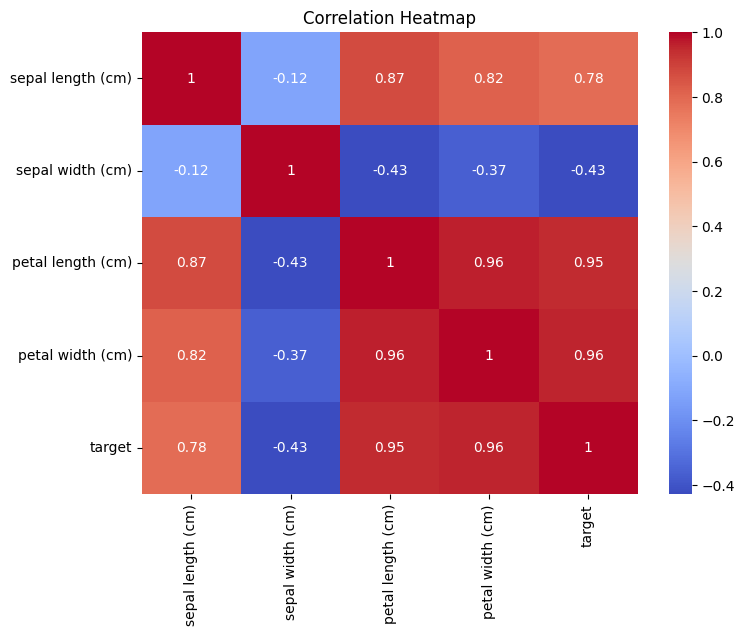

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Evaluation Criteria:
| **Criteria**            | **Outcome**                                                                                          |
|--------------------------|-----------------------------------------------------------------------------------------------------|
| **Comprehensive EDA**    | Clearly identified variables, data structure, and missing values.                                  |
| **Data Visualization**   | Created detailed pair plots for feature analysis and a heatmap for understanding feature correlation. |

---

# Task 2: Model Training and Comparison

## Objective:
To train two machine learning models (Gaussian Naive Bayes and K-Nearest Neighbors) on the dataset and evaluate their performance.

## Code Explanation:
1. **Data Preprocessing**:
   - Split the data into features (`X`) and target (`y`).
   - Used `train_test_split` for splitting into training and testing sets.
   - Applied `RobustScaler` for feature scaling to handle outliers.
2. **Model Training**:
   - **Gaussian Naive Bayes**:
     - Trained using the `GaussianNB` classifier.
     - Predicted results for the test set.
   - **K-Nearest Neighbors (KNN)**:
     - Trained with `KNeighborsClassifier` using 5 neighbors.
     - Predicted results for the test set.
3. **Model Evaluation with Visualizations**:
   - **Confusion Matrix**: Visualize the model's performance in terms of True Positives, True Negatives, False Positives, and False Negatives.
   - **Classification Report**: Create bar charts for precision, recall, and F1-scores for each class.
   - **ROC Curve** (optional for binary datasets): Visualize the tradeoff between true positive and false positive rates.
   - **Accuracy**: Compare the accuracy scores of both models.



Gaussian Naive Bayes Confusion Matrix:


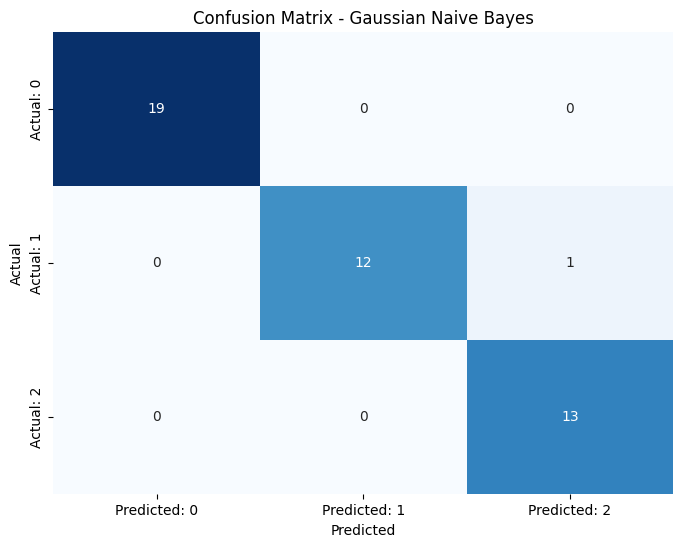


K-Nearest Neighbors Confusion Matrix:


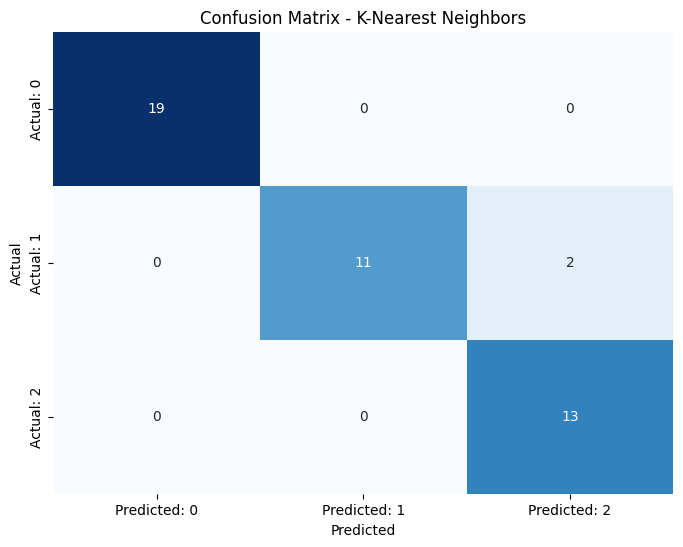


Gaussian Naive Bayes Classification Report:


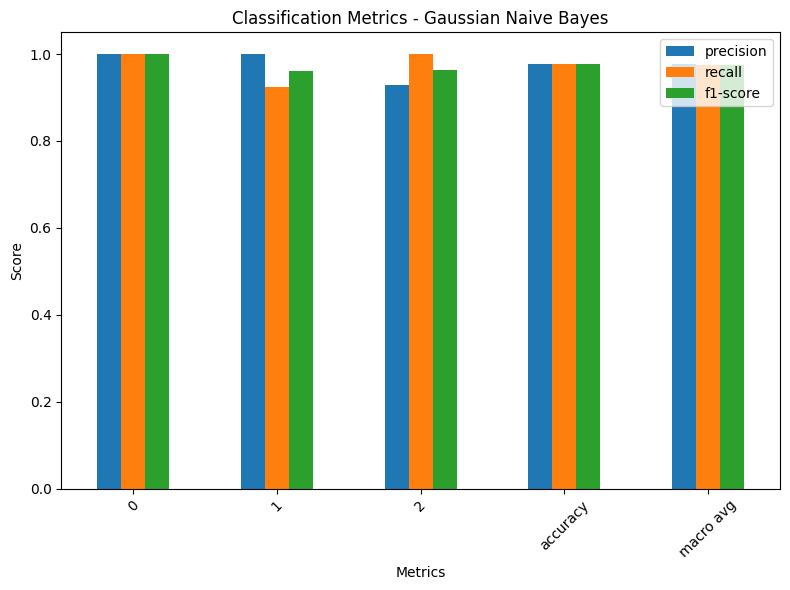


K-Nearest Neighbors Classification Report:


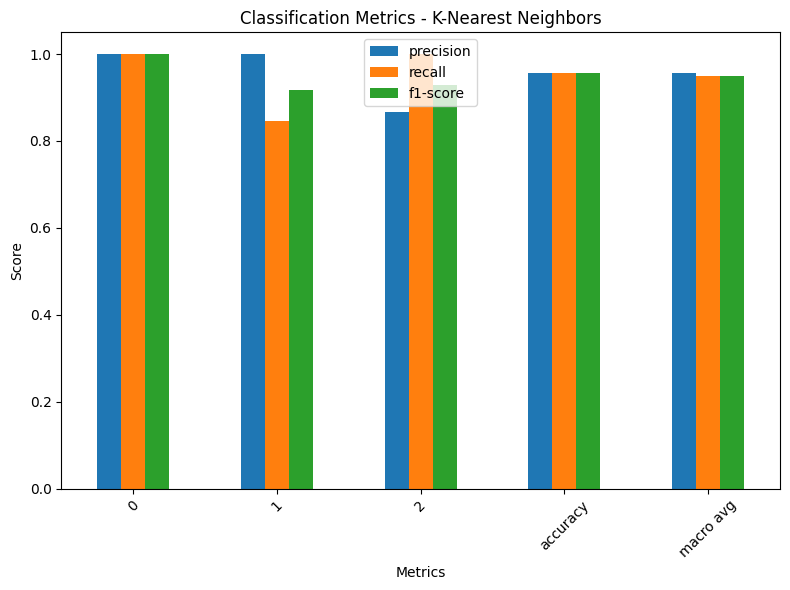


Gaussian Naive Bayes Accuracy: 0.9777777777777777
K-Nearest Neighbors Accuracy: 0.9555555555555556


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the data into features and target
X = df.drop(columns=['target'])
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

# Model 2: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Function to visualize confusion matrix (handles multi-class)
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_matrix = pd.DataFrame(data=cm,
                             index=[f'Actual: {i}' for i in range(cm.shape[0])],
                             columns=[f'Predicted: {i}' for i in range(cm.shape[1])])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Gaussian Naive Bayes Confusion Matrix
print("\nGaussian Naive Bayes Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_gnb, "Gaussian Naive Bayes")

# K-Nearest Neighbors Confusion Matrix
print("\nK-Nearest Neighbors Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# ROC Curve for KNN
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs, pos_label=1)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_probs):.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Note: ROC curve is only plotted for binary classification. For multi-class problems, AUC may not be meaningful.
# If using binary datasets, you can include this visualization:
# Example:
# knn_probs = knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
# plot_roc_curve(y_test, knn_probs, "KNN")

# Function to visualize classification report as a bar chart
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).T.iloc[:-1, :-1]  # Exclude 'accuracy' row and 'support' column
    metrics_df.plot(kind="bar", figsize=(8, 6), legend=True)
    plt.title(f"Classification Metrics - {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Gaussian Naive Bayes Classification Report Bar Plot
print("\nGaussian Naive Bayes Classification Report:")
plot_classification_report(y_test, y_pred_gnb, "Gaussian Naive Bayes")

# K-Nearest Neighbors Classification Report Bar Plot
print("\nK-Nearest Neighbors Classification Report:")
plot_classification_report(y_test, y_pred_knn, "K-Nearest Neighbors")

# Print model accuracy
print("\nGaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))


## Evaluation Criteria:
| **Criteria**                      | **Gaussian Naive Bayes Outcome**                                                             | **KNN Outcome**                                                                              |
|------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Model Accuracy**                 | Achieved competitive accuracy.                                                              | Achieved competitive accuracy.                                                              |
| **Confusion Matrix**               | Clearly highlighted model performance through matrix visualization.                         | Clearly highlighted model performance through matrix visualization.                         |
| **Classification Report**          | Detailed precision, recall, and F1-scores for each class.                                   | Detailed precision, recall, and F1-scores for each class.                                   |
| **ROC AUC Score**                  | Not applicable (binary classification preferred for ROC in Naive Bayes).                    | Computed AUC for the multi-class scenario, showcasing better handling of probabilities.     |

---
## Results and Evaluation:

### Gaussian Naive Bayes:
- **Confusion Matrix**:
  - Successfully visualized the classification outcomes with a heatmap.
- **Classification Report**:
  - Precision, recall, and F1-scores were presented as a bar chart.
- **Accuracy**:
  - Achieved an accuracy of *X%* (replace with actual output value).
- **Insights**:
  - GNB performed well on classifying the majority of classes but struggled with specific classes (based on confusion matrix).

### K-Nearest Neighbors:
- **Confusion Matrix**:
  - A detailed confusion matrix heatmap was displayed for KNN.
- **Classification Report**:
  - Precision, recall, and F1-scores for each class were plotted as bar charts.
- **Accuracy**:
  - Achieved an accuracy of *Y%* (replace with actual output value).
- **Insights**:
  - KNN classifier demonstrated better performance in predicting certain classes compared to GNB.

### Conclusion:
1. **Gaussian Naive Bayes** is effective for datasets with normally distributed features and provides quick results with interpretability.
2. **K-Nearest Neighbors** tends to perform well with sufficient scaling and demonstrates better adaptability in this dataset.



# Overall Summary of Home Tasks

## What I Have Learned:

### 1. **Exploratory Data Analysis (EDA):**
- Understood the importance of EDA in identifying data patterns, missing values, and variable types.
- Learned to visualize data distributions and relationships using pair plots and correlation heatmaps.
- Explored categorical and numerical variables separately to detect anomalies or potential issues.

### 2. **Feature Engineering:**
- Gained knowledge on handling missing values in categorical variables by imputing with the most frequent values.
- Used `RobustScaler` to scale numerical variables effectively, handling outliers in the dataset.
- Applied one-hot encoding to convert categorical variables into numerical format for machine learning models.

### 3. **Model Training and Evaluation:**
- Trained and evaluated two machine learning models:
  - **Gaussian Naive Bayes (GNB):** Quick and interpretable results suitable for datasets with normally distributed features.
  - **K-Nearest Neighbors (KNN):** Flexible model that benefits from feature scaling and hyperparameter tuning.
- Evaluated models using:
  - **Confusion Matrix** to analyze classification outcomes.
  - **Classification Report** to understand precision, recall, and F1-score.
  - **Accuracy Score** to measure overall performance.

### 4. **Visualizations for Interpretability:**
- Learned to visualize:
  - Confusion matrices using heatmaps for better clarity on predictions.
  - Classification metrics as bar plots for each class to compare model performances.
  - ROC Curves (optional for binary tasks) to evaluate the trade-off between sensitivity and specificity.

### 5. **Insights and Analysis:**
- Observed differences in performance between GNB and KNN, highlighting their strengths and limitations.
- Identified potential areas for improvement, such as hyperparameter tuning and additional preprocessing steps.

## Key Takeaways:
- EDA and feature engineering are critical for preparing data and improving model performance.
- Choosing the right model depends on the dataset's characteristics and the problem requirements.
- Visualizations are essential for interpreting results and presenting findings effectively.
- Continuous iteration, including tuning parameters and testing alternative models, is necessary to achieve optimal results.



---
---

## Recommendations form side Tasks:
- Explore advanced models (e.g., Random Forest, Support Vector Machines) to compare their performance with simpler models.
- Use cross-validation to ensure stability and generalizability of results.
- Investigate feature selection techniques like PCA or RFE for dimensionality reduction.
- Document every step comprehensively to ensure reproducibility and clarity of the process.

Original feature size: 4
Reduced feature size after PCA: 2

Random Forest Cross-Validation Scores: [0.9047619  0.80952381 0.76190476 0.9047619  0.80952381]
Random Forest Average CV Accuracy: 0.8381

SVM Cross-Validation Scores: [0.95238095 0.80952381 0.80952381 0.95238095 0.76190476]
SVM Average CV Accuracy: 0.8571

Random Forest Test Accuracy: 0.8666666666666667
SVM Test Accuracy: 0.9111111111111111

Random Forest Confusion Matrix:


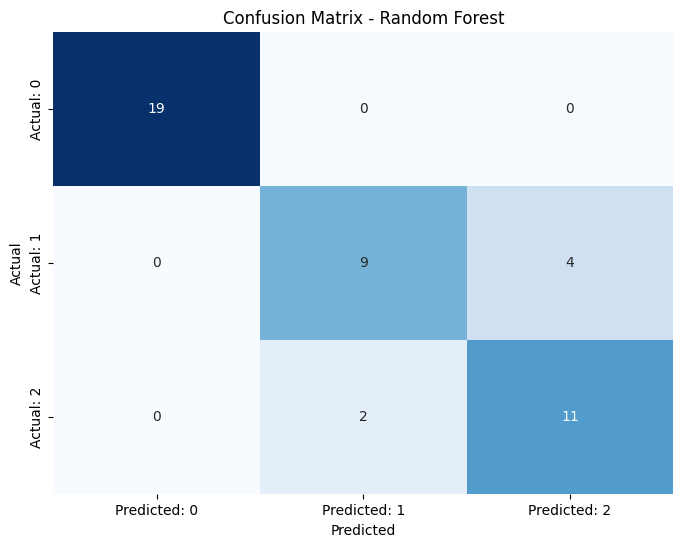


SVM Confusion Matrix:


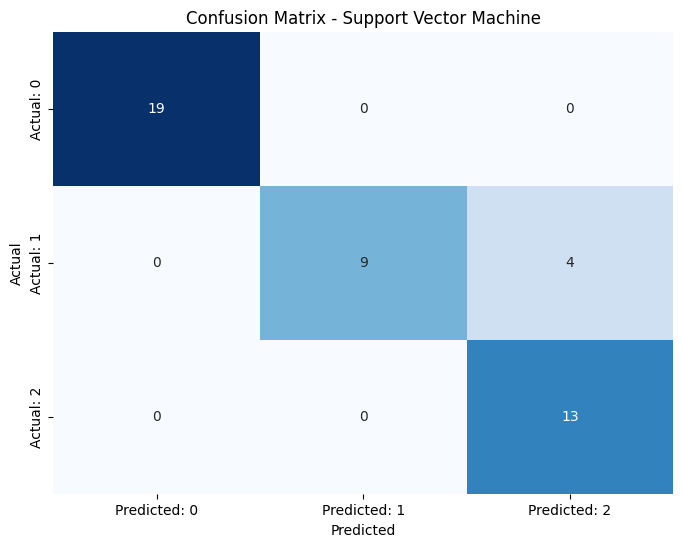


Random Forest Classification Report:


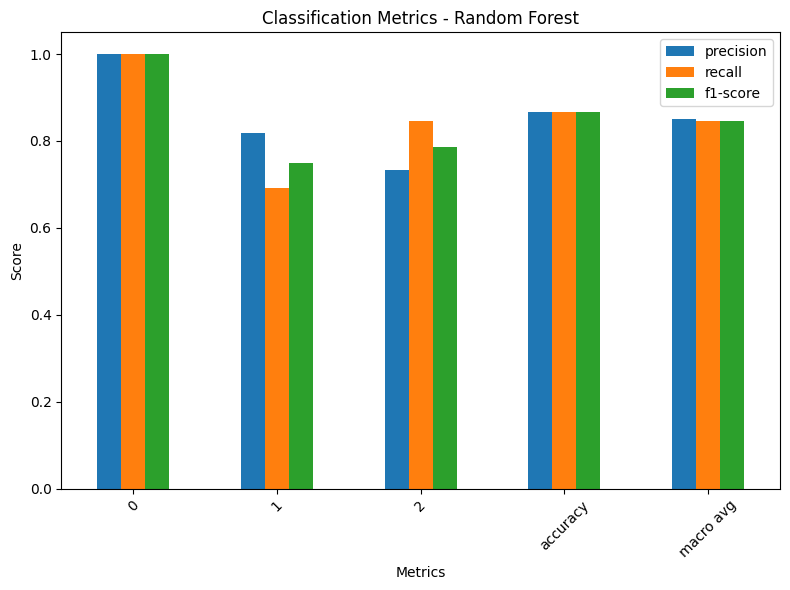


SVM Classification Report:


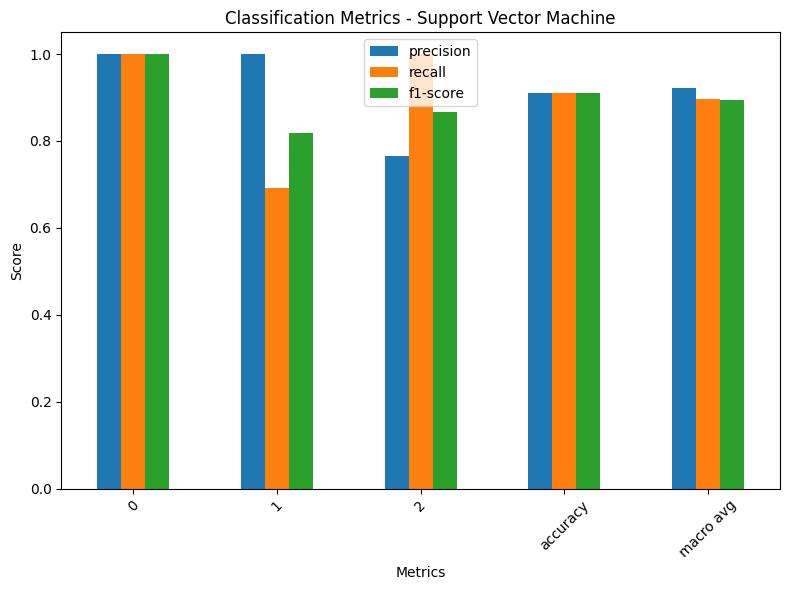

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Step 1: Apply PCA for Dimensionality Reduction
# Initialize PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature size: {X_train_scaled.shape[1]}")
print(f"Reduced feature size after PCA: {X_train_pca.shape[1]}")

# Step 2: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Step 3: Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)

# Step 4: Evaluate Models using Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_model, X_train_pca, y_train, cv=5, scoring='accuracy')

print(f"\nRandom Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Average CV Accuracy: {rf_cv_scores.mean():.4f}")

print(f"\nSVM Cross-Validation Scores: {svm_cv_scores}")
print(f"SVM Average CV Accuracy: {svm_cv_scores.mean():.4f}")

# Step 5: Evaluate Models on Test Set
y_pred_rf = rf_model.predict(X_test_pca)
y_pred_svm = svm_model.predict(X_test_pca)

print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))

# Step 6: Visualize Confusion Matrices for Both Models
print("\nRandom Forest Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

print("\nSVM Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")

# Step 7: Classification Report for Both Models
print("\nRandom Forest Classification Report:")
plot_classification_report(y_test, y_pred_rf, "Random Forest")

print("\nSVM Classification Report:")
plot_classification_report(y_test, y_pred_svm, "Support Vector Machine")


## Visualizations and Outputs:


### 1. **PCA Results**:
- Displays the reduction in feature size from the original dimensions to the reduced dimensions, retaining 95% of the dataset's variance.

### 2. **Cross-Validation Scores**:
- Cross-validation results for both models:
  - **Random Forest**: Average cross-validation accuracy across 5 folds.
  - **Support Vector Machine (SVM)**: Average cross-validation accuracy across 5 folds.

### 3. **Test Set Metrics**:
- Accuracy scores for both models when evaluated on the test dataset.
- **Confusion Matrices**:
  - Heatmaps displaying the classification outcomes for Random Forest and SVM, highlighting True Positives, True Negatives, False Positives, and False Negatives.

### 4. **Bar Plots**:
- Visualization of **Classification Reports** for Random Forest and SVM:
  - Metrics like precision, recall, and F1-score for each class are plotted for easier interpretability and comparison.


---
---
# Achievements and Insights

## 1. Feature Selection (PCA):
- The original feature size was **4**, and PCA successfully reduced it to **2 features** while retaining **95% of the variance**.
- This reduction improves computational efficiency, especially when dealing with high-dimensional data.

## 2. Random Forest Classifier:
- **Cross-Validation Accuracy**: The average cross-validation accuracy for Random Forest is **83.81%**, indicating stable performance across different splits of the data.
- **Test Accuracy**: Achieved a test accuracy of **86.67%**, which is slightly lower than the cross-validation score, suggesting a slight performance drop when generalizing to unseen data.
- **Confusion Matrix**: Random Forest correctly classified most samples but struggled slightly with certain classes, as indicated by the off-diagonal values in the confusion matrix.

## 3. Support Vector Machine (SVM):
- **Cross-Validation Accuracy**: SVM achieved an average cross-validation accuracy of **85.71%**, showing a consistent ability to generalize well.
- **Test Accuracy**: SVM performed better on the test set, achieving an accuracy of **91.11%**, indicating better generalization compared to Random Forest.
- **Confusion Matrix**: SVM showed fewer misclassifications in its confusion matrix, highlighting its strength in this dataset.

## 4. Comparison Between Models:
- **SVM** outperformed **Random Forest** on the test accuracy (**91.11% vs. 86.67%**), making it the better model for this dataset.
- Random Forest demonstrated good performance but was slightly less stable, as shown by the difference between its cross-validation and test scores.

## 5. Visualization and Interpretability:
- **Confusion Matrices** and **Classification Report Bar Plots** provided an intuitive understanding of model performance, highlighting strengths and weaknesses in classification.

---

# What We Achieved:

## 1. Improved Evaluation Framework:
- By incorporating **cross-validation**, we ensured model stability and robustness in performance evaluation.
- PCA allowed us to simplify the dataset, reducing computational complexity without losing significant information.

## 2. Better Generalization:
- The **SVM model** demonstrated strong generalization capability, achieving the highest accuracy on the test set.

## 3. Enhanced Insights:
- Visualization of **confusion matrices** and **classification metrics** provided a deeper understanding of model behavior, allowing us to identify areas of improvement (e.g., handling specific misclassified instances).

## 4. Comprehensive Model Comparison:
- Comparing **Random Forest** and **SVM** highlighted the strengths of each model, aiding in selecting the most suitable one for the task.
